# 1007 Final Project Movies Recommender System


In [59]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
                                                                                                                                                                                            


## Recommender based on genres and ratings

In [60]:
moviedata = pd. read_csv('movies_metadata.csv')
#moviedata.head(30)
moviedata.columns.values

/Applications/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'], dtype=object)

In [61]:
moviedata.shape

(45466, 24)

In [62]:
moviedata['genres']= moviedata['genres'].fillna('[]')

In [63]:
moviedata['genres']=moviedata['genres'].apply(literal_eval)

In [64]:
moviedata['genres']= moviedata['genres'].apply(lambda x : [i['name'] for i in x] if isinstance(x,list) else [])

In [65]:
#moviedata['genres']

> From the IMDb site: 

>The formula for calculating the Top Rated 250 Titles gives a true Bayesian estimate:

>Weighted Rating (WR) = $(\frac{v}{v+m} * R) + (\frac{m}{(v+m)}* C) $

>Where:
>R = average for the movie (mean) = (Rating)

>v = number of votes for the movie = (votes)

>m = minimum votes required to be listed in the Top 250 (currently 25000)

>C = the mean vote across the whole report (currently 7.0)

>For the Top 250, only votes from regular voters are considered.@

** We are going to use this formula to rate our moviedata. We need to redefine m and C **

In [66]:
moviedata.head(30)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [67]:
for i in moviedata.columns:
    print(i)

adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


## Features:
** adult:** 0 or 1

** belongs_to_collection: ** A list of dictionaries

** genres:** A stringified list of dictionaries

** budget:** Numeric

** imdb_id:** Numeric

** homepage:** String

** id:** Numeric

** original_language:** String

** original_title:**String

** overview:**String

** popularity:** Numeric

** production_companies:** String

** production_countries:** String

** release_date:** Numeric

** revenue:** Numerci

**runtime:** Numeric

**spoken_languages:** String

**status:** String

**tagline:** String

**title:** String

**video:** String

**vote_average:** Numeric

**vote_count:** Numeric


moviedata.info()

In [68]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [69]:
moviedata.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


**According to the descriptive chart, we noticed that there are some movies in our list with relatively low and even 0 voters to rating. So we are going to fliter movies which has votes more than  at least 95% of the movies.**

In [70]:
moviedata['vote_count']=moviedata['vote_count'].fillna(0)

In [71]:
m=int(np.percentile(moviedata['vote_count'], 95))

In [72]:
moviedata[moviedata['vote_count']>=m]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
15,False,NaN,52000000,"[Drama, Crime]",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1995-11-22,1.161124e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0
17,False,NaN,4000000,"[Crime, Comedy]",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,1995-12-09,4.300000e+06,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0
18,False,"{'id': 3167, 'name': 'Ace Ventura Collection',...",30000000,"[Crime, Comedy, Adventure]",NaN,9273,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",...,1995-11-10,2.123855e+08,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0
31,False,NaN,29500000,"[Science Fiction, Thriller, Mystery]",NaN,63,tt0114746,en,Twelve Monkeys,"In the year 2035, convict James Cole reluctant...",...,1995-12-29,1.688400e+08,129.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The future is history.,Twelve Monkeys,False,7.4,2470.0
33,False,"{'id': 9435, 'name': 'Babe Collection', 'poste...",30000000,"[Fantasy, Drama, Comedy, Family]",NaN,9598,tt0112431,en,Babe,Babe is a little pig who doesn't quite know hi...,...,1995-07-18,2.541349e+08,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A little pig goes a long way.,Babe,False,6.0,756.0
38,False,NaN,12000000,"[Comedy, Drama, Romance]",NaN,9603,tt0112697,en,Clueless,"Shallow, rich and socially successful Cher is ...",...,1995-07-19,0.000000e+00,97.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Sex. Clothes. Popularity. Is there a problem h...,Clueless,False,6.9,828.0


In [73]:
C=moviedata[moviedata['vote_average'].notnull()]['vote_average'].mean()

In [74]:
#C

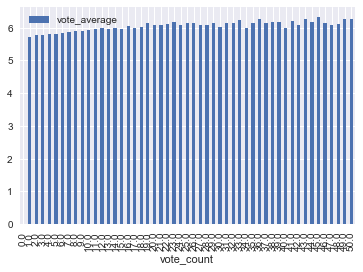

In [75]:
moviedata[['vote_count','vote_average']].groupby('vote_count').mean()[:50].plot(kind='bar')

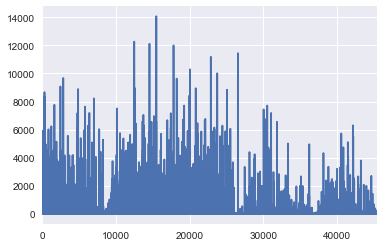

In [76]:
moviedata['vote_count'].plot(kind='line')

In [77]:
# df= moviedata.groupby('vote_count').size()[:100]
# df.plot.bar(figsize=(20,10))

In [78]:
#moviedata.shape

In [79]:
moviedata['year'] = pd.to_datetime(moviedata['release_date'], errors='coerce').map(lambda x: x.year)

In [80]:
#moviedata['year']

In [81]:
'''fliter movies with vote_counts more than 95% movies '''
newmoviedata= moviedata[((moviedata['vote_count']>=m) & (moviedata['vote_average'].notnull()))]

In [82]:
#newmoviedata.head()

In [83]:
#newmoviedata.columns

In [84]:
# import seaborn as sns
# corr=moviedata.corr()
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr,  cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
'''extract uesful columns '''
usefulcol=['title','year','genres','popularity','vote_average','vote_count']
usefulm_data=newmoviedata[usefulcol]

In [86]:
usefulm_data.shape
## our data to be considered for our recommendation system has 2282 movies with 6 importane features

(2282, 6)

In [87]:
'''create the column of weighted rating scores'''
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [88]:
usefulm_data['weighted_rating']=weighted_rating(usefulm_data)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
usefulm_data.head()

,title,year,genres,popularity,vote_average,vote_count,weighted_rating
0,Toy Story,1995.0,"[Animation, Comedy, Family]",21.9469,7.7,5415.0,7.545859
1,Jumanji,1995.0,"[Adventure, Fantasy, Family]",17.0155,6.9,2413.0,6.704984
5,Heat,1995.0,"[Action, Crime, Drama, Thriller]",17.9249,7.7,1886.0,7.311291
9,GoldenEye,1995.0,"[Adventure, Action, Thriller]",14.686,6.6,1194.0,6.338712
15,Casino,1995.0,"[Drama, Crime]",10.1374,7.8,1343.0,7.268065


In [90]:
for x in usefulm_data['year']:
    if x!=np.nan:
        x=int(x)
    else:
        x=np.nan

In [91]:
usefulm_data['year']=usefulm_data['year'].astype(int)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
top250=usefulm_data.sort_values('weighted_rating',ascending= False)[:250]

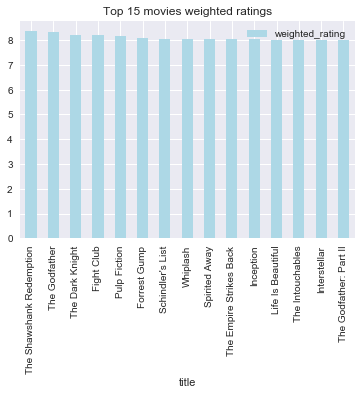

In [93]:
top250[:15].plot(x='title',y='weighted_rating',kind='bar',color='lightblue',title='Top 15 movies weighted ratings')

### Top Movies

In [94]:
sortmovie=usefulm_data.sort_values('weighted_rating',ascending= False)

In [95]:
'''get all genres in metadata'''
moviedata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music',
       'Documentary', 'Western', 'TV Movie', 'Carousel Productions',
       'Vision View Entertainment', 'Telescene Film Group Productions',
       'Aniplex', 'GoHands', 'BROSTA TV',
       'Mardock Scramble Production Committee', 'Sentai Filmworks',
       'Odyssey Media', 'Pulser Productions', 'Rogue State', 'The Cartel'], dtype=object)

#### Top Crime Movie ####

In [96]:
sortmovie[sortmovie['genres'].apply(lambda x:  'Crime' in x)]

,title,year,genres,popularity,vote_average,vote_count,weighted_rating
314,The Shawshank Redemption,1994,"[Drama, Crime]",51.6454,8.5,8358.0,8.358058
834,The Godfather,1972,"[Drama, Crime]",41.1093,8.5,6024.0,8.306750
12481,The Dark Knight,2008,"[Drama, Action, Crime, Thriller]",123.167,8.3,12269.0,8.208580
292,Pulp Fiction,1994,"[Thriller, Crime]",140.95,8.3,8670.0,8.172436
1178,The Godfather: Part II,1974,"[Drama, Crime]",36.6293,8.3,3418.0,7.998464
289,Leon: The Professional,1994,"[Thriller, Crime, Drama]",20.4773,8.2,4293.0,7.963454
3030,The Green Mile,1999,"[Fantasy, Drama, Crime]",19.9668,8.2,4166.0,7.956922
46,Se7en,1995,"[Crime, Mystery, Thriller]",18.4574,8.1,5915.0,7.930716
1170,GoodFellas,1990,"[Drama, Crime]",15.4241,8.2,3211.0,7.893217
586,The Silence of the Lambs,1991,"[Crime, Drama, Thriller]",4.30722,8.1,4549.0,7.884300


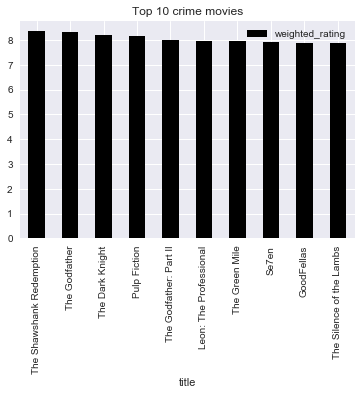

In [97]:
top20Crimemovie=sortmovie[sortmovie['genres'].apply(lambda x:  'Crime' in x)][:10]
top20Crimemovie.plot(x='title',y='weighted_rating',kind='bar',color='black',title='Top 10 crime movies')
plt.savefig('top crime movie.png')

#### Top Action Movie ####

In [98]:
sort_action_mv=sortmovie[sortmovie['genres'].apply(lambda x:  'Action' in x)]

In [99]:
len(sort_action_mv)

724

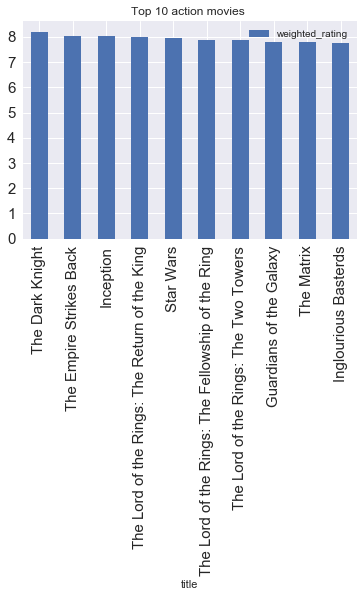

In [100]:
sort_action_mv[:10].plot(x='title',y='weighted_rating', kind='bar',fontsize=15, title='Top 10 action movies ')
plt.savefig('top action movie.png')

#### Top Romance Movie####

In [101]:
sort_romance_mv=sortmovie[sortmovie['genres'].apply(lambda x:  'Romance' in x)]
len(sort_romance_mv)

335

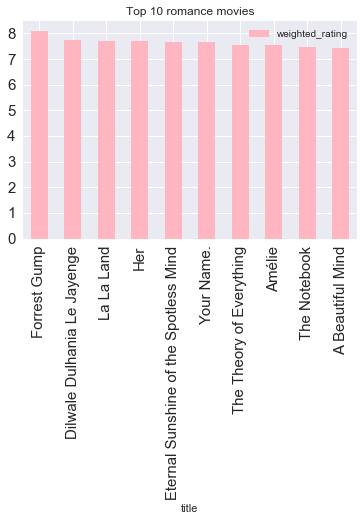

In [102]:
sort_romance_mv[:10].plot(x='title',y='weighted_rating', kind='bar',color='lightpink',fontsize=15, title='Top 10 romance movies')
plt.savefig('top romance movie.png')

#### sorted movies with specified genre function ####

In [103]:
def TopMovieWithSpecifiedGenre(genre):
    #print(sortmovie[sortmovie['genres'].apply(lambda x:  genre in x)])
    return sortmovie[sortmovie['genres'].apply(lambda x:  genre in x)][:20][['title','year']]
def PlotTop20MovieWithGenre(genre):
    sortmovie[sortmovie['genres'].apply(lambda x:  genre in x)][:20].plot(x='title',y='weighted_rating', kind='bar',fontsize=15, title='Top 20 '+ genre+' movies rating')
    plt.savefig('top '+genre+' movie.png')
    return plt

In [104]:
user_choice = input("Input the genre of movie you'd like to watch and you will get a surprise!(!note!Plz input with first letter captialized)\n Input 'Q' to quit>>> ")
while user_choice != 'Q':
    try: 
        print(TopMovieWithSpecifiedGenre(user_choice))
    except IndexError:
        print('Oops! we have limited database So we cannot provied you with related movie T_T')
    user_choice = input("Input the genre of movie you'd like to watch and you will get a surprise!(!note!Plz input with first letter captialized)\n Input 'Q' to quit>>> ")
print('Have a nice day ^o^')    

Input the genre of movie you'd like to watch and you will get a surprise!(!note!Plz input with first letter captialized)
 Input 'Q' to quit>>> Comedy
                                                   title  year
351                                         Forrest Gump  1994
2211                                   Life Is Beautiful  1997
18465                                   The Intouchables  2011
1225                                  Back to the Future  1985
22841                           The Grand Budapest Hotel  2014
22131                            The Wolf of Wall Street  2013
30315                                         Inside Out  2015
10309                        Dilwale Dulhania Le Jayenge  1995
40882                                         La La Land  2016
13724                                                 Up  2009
24455                                         Big Hero 6  2014
1604                                     The Truman Show  1998
4843                           

In [105]:
TopMovieWithSpecifiedGenre('Thriller')

,title,year
12481,The Dark Knight,2008
292,Pulp Fiction,1994
15480,Inception,2010
289,Leon: The Professional,1994
46,Se7en,1995
1176,Psycho,1960
586,The Silence of the Lambs,1991
4099,Memento,2000
1213,The Shining,1980
1057,Reservoir Dogs,1992


<module 'matplotlib.pyplot' from '/Applications/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

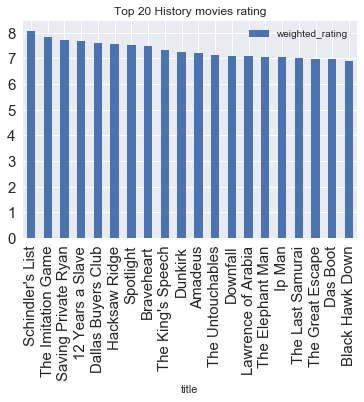

In [106]:
PlotTop20MovieWithGenre('History')

In [107]:
#sortmovie.head(15)

## Content Based Recommender

Next, we build a content based recommender based on the descriptions. Since the origin data is really big and my computer resource is limited, so we just selected a subset of all the movies available to us. 

In [108]:
'''linkd_small.csv only contains 3 conlumns including movieId, imdbId, and tmdbId'''
links_small = pd.read_csv('links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [109]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [110]:
moviedata['id'] = moviedata['id'].apply(convert_int)

In [111]:
moviedata[moviedata['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,year
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[Carousel Productions, Vision View Entertainme...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[Odyssey Media, Pulser Productions, Rogue Stat...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [112]:
moviedata = moviedata.drop([19730, 29503, 35587])

In [113]:

moviedata['id'] = moviedata['id'].astype('int')

In [114]:
selectedmd = moviedata[moviedata['id'].isin(links_small)]
selectedmd.shape

(9099, 25)

In [115]:
selectedmd['genres']

0                              [Animation, Comedy, Family]
1                             [Adventure, Fantasy, Family]
2                                        [Romance, Comedy]
3                                 [Comedy, Drama, Romance]
4                                                 [Comedy]
5                         [Action, Crime, Drama, Thriller]
6                                        [Comedy, Romance]
7                       [Action, Adventure, Drama, Family]
8                            [Action, Adventure, Thriller]
9                            [Adventure, Action, Thriller]
10                                [Comedy, Drama, Romance]
11                                        [Comedy, Horror]
12                          [Family, Animation, Adventure]
13                                        [History, Drama]
14                                     [Action, Adventure]
15                                          [Drama, Crime]
16                                        [Drama, Romanc

We have **9099** movies avaiable in our small movies metadata dataset which is 5 times smaller than our original dataset of 45000 movies.

In [116]:
selectedmd['tagline'] = selectedmd['tagline'].fillna('')
selectedmd['description'] = selectedmd['overview'] + selectedmd['tagline']
selectedmd['description'] = selectedmd['description'].fillna('')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [117]:
#selectedmd['description']

In [118]:
#selectedmd.info()

In [119]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(selectedmd['description'])

In [120]:
tfidf_matrix.shape

(9099, 268124)

#### Cosine Similarity

 
$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||} $



In [121]:
'''calculate Cosine Similarity'''
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [122]:
cosine_sim[0]#Similarity between the first movie and all movies including itself.

array([ 1.        ,  0.00680476,  0.        , ...,  0.        ,
        0.00344913,  0.        ])

In [123]:
cosine_sim[1]#Similarity between the second movie and all movies including itself.

array([ 0.00680476,  1.        ,  0.01531062, ...,  0.00357057,
        0.00762326,  0.        ])

Write a function that returns the 30 most similar movies based on the cosine similarity score.

In [124]:
selectedmd = selectedmd.reset_index()
# titles = selectedmd['title']
# indices = pd.Series(selectedmd.index, index=selectedmd['title'])

In [125]:
# indices['The Godfather']

In [126]:
newdf=pd.DataFrame(selectedmd['title'], selectedmd.index)

In [127]:
newdf.iloc[0]['title']

'Toy Story'

In [128]:
'''get movie location in our data by title'''
def Get_Movie_Location(moviename):
    for i in newdf.index:
        m = re.search(moviename,newdf.iloc[i]['title'],re.I)
#     if newdf.iloc[i]['title']==patternmoviename:
        if bool(m):
            return i 

In [129]:
Get_Movie_Location('The Godfather')

692

In [130]:
# sim_scores= list(enumerate(cosine_sim[Get_Movie_Location('The Godfather')]))

In [131]:
# top30smv=sorted(sim_scores, key=lambda x: x[1],reverse = True)[1:31]

In [132]:
#newdf['title'].iloc[]
# for i in range(30):
#         print(newdf.iloc[top30smv[i][0]]['title'])

In [133]:
def GetSimilarMovie(moviename):
    similarity_scores=list(enumerate(cosine_sim[Get_Movie_Location(moviename)]))
    top30smv=sorted(similarity_scores, key=lambda x: x[1],reverse = True)[1:31]
#     similar_list=[]
    movieidx=[]
    for i in range(30):
#         similar_list.append(newdf.iloc[top30smv[i][0]]['title'])
        movieidx.append(top30smv[i][0])
    movies = selectedmd.iloc[movieidx][['title','vote_count','vote_average','year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['weighted_rating'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('weighted_rating', ascending=False).head(10)
    
    return qualified

In [134]:
GetSimilarMovie('The Godfather')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,title,vote_count,vote_average,year,weighted_rating
973,The Godfather: Part II,3418,8,1974.0,7.732195
1582,The Godfather: Part III,1589,7,1990.0,6.704097
4144,Road to Perdition,1102,7,2002.0,6.610217
7741,Elite Squad: The Enemy Within,477,7,2010.0,6.342510
2192,The Color Purple,345,7,1985.0,6.230956
7591,Machete,1171,6,2010.0,5.896935
8816,Run All Night,1169,6,2015.0,5.896806
8387,The Family,1052,6,2013.0,5.888676
4221,8 Women,197,6,2002.0,5.737593
2159,Summer of Sam,115,6,1999.0,5.698328


In [135]:
GetSimilarMovie('Force Majeure')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,title,vote_count,vote_average,year,weighted_rating
7171,The Girl with the Dragon Tattoo,1020,7,2009.0,6.588220
7889,We Need to Talk About Kevin,687,7,2011.0,6.465789
985,The Sting,639,7,1973.0,6.441869
729,Charade,351,7,1963.0,6.236841
5729,The Battle of Algiers,167,7,1966.0,6.002806
1699,Sixteen Candles,455,6,1984.0,5.813833
6477,Chaos,278,6,2005.0,5.767488
8800,45 Years,259,6,2015.0,5.761104
9098,Force Majeure,255,6,2014.0,5.759715
8988,Ashby,191,6,2015.0,5.735070


In [136]:
GetSimilarMovie('The Dark Knight')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,title,vote_count,vote_average,year,weighted_rating
7931,The Dark Knight Rises,9263,7,2012.0,6.938292
6144,Batman Begins,7511,7,2005.0,6.924683
7933,Sherlock Holmes: A Game of Shadows,3971,7,2011.0,6.864143
524,Batman,2145,7,1989.0,6.767915
7344,Law Abiding Citizen,1522,7,2009.0,6.693956
6667,Fracture,908,7,2007.0,6.553828
2696,JFK,513,7,1991.0,6.367530
1113,Batman Returns,1706,6,1992.0,5.922713
6740,Rush Hour 3,801,6,2007.0,5.866032
132,Batman Forever,1529,5,1995.0,5.136434


In [137]:
GetSimilarMovie('Toy Story')

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,title,vote_count,vote_average,year,weighted_rating
7535,Toy Story 3,4710,7,2010.0,6.883664
2502,Toy Story 2,3914,7,1999.0,6.862361
6290,Match Point,1134,7,2005.0,6.618177
994,Manhattan,600,7,1979.0,6.420797
889,Rebel Without a Cause,351,7,1955.0,6.236841
865,Sleeper,206,7,1973.0,6.063668
6193,The 40 Year Old Virgin,2020,6,2005.0,5.932606
2547,Man on the Moon,444,6,1999.0,5.811498
2615,White Men Can't Jump,305,6,1992.0,5.775994
1938,Stepmom,286,6,1998.0,5.770075


In [138]:
user_choice = input("Input some keywords of a movie!\nInput 'Q' to quit. \n>>> ")
while user_choice != 'Q':
    try:
        print(GetSimilarMovie(user_choice))
    
    except IndexError:
        print('Oops! we have limited database So we cannot related movie T_T')
    user_choice = input("Input some keywords of a movie!\n Input 'Q' to quit. \n>>> ")
print('Have a nice day! Bye ^o^')


Input some keywords of a movie!
Input 'Q' to quit. 
>>> Q
Have a nice day! Bye ^o^
